<a href="https://colab.research.google.com/github/losier/Mental-Health-Tweets-Analyse/blob/master/Mental_Health_Tweets_Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
import pandas as pd
import os
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import style
style.use('seaborn-whitegrid')

from textblob import TextBlob
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from nltk.stem import PorterStemmer

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

<ipython-input-2-7892aaf269cc>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-whitegrid')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download infamouscoder/mental-health-social-media

 91% 1.00M/1.10M [00:00<00:00, 2.02MB/s]
100% 1.10M/1.10M [00:00<00:00, 2.12MB/s]


In [ ]:
! unzip mental-health-social-media.zip

Archive:  mental-health-social-media.zip
  inflating: Mental-Health-Twitter.csv  


In [ ]:
df = pd.read_csv("/content/Mental-Health-Twitter.csv")
df.head(10)

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
5,5,637692793083817985,Sat Aug 29 18:26:24 +0000 2015,Making packing lists is my new hobby... #movin...,1013187241,84,211,251,837,1,1
6,6,637691649943072772,Sat Aug 29 18:21:51 +0000 2015,At what point does keeping stuff for nostalgic...,1013187241,84,211,251,837,1,1
7,7,637689418472652800,Sat Aug 29 18:12:59 +0000 2015,Currently in the finding-boxes-of-random-shit ...,1013187241,84,211,251,837,0,1
8,8,637687177946734592,Sat Aug 29 18:04:05 +0000 2015,"Can't be bothered to cook, take away on the wa...",1013187241,84,211,251,837,0,1
9,9,637684866906255360,Sat Aug 29 17:54:54 +0000 2015,RT @itventsnews: ITV releases promo video for ...,1013187241,84,211,251,837,41,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'post_id', 'post_created', 'post_text', 'user_id',
       'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label'],
      dtype='object')

In [ ]:
text_df = df.drop(
    ['Unnamed: 0', 'post_id', 'post_created', 'user_id', 'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label'],
    axis=1
)

text_df.head(10)

,post_text
0,It's just over 2 years since I was diagnosed w...
1,"It's Sunday, I need a break, so I'm planning t..."
2,Awake but tired. I need to sleep but my brain ...
3,RT @SewHQ: #Retro bears make perfect gifts and...
4,It’s hard to say whether packing lists are mak...
5,Making packing lists is my new hobby... #movin...
6,At what point does keeping stuff for nostalgic...
7,Currently in the finding-boxes-of-random-shit ...
8,"Can't be bothered to cook, take away on the wa..."
9,RT @itventsnews: ITV releases promo video for ...


In [ ]:
print(text_df['post_text'].iloc[0], "\n")
print(text_df['post_text'].iloc[1], "\n")
print(text_df['post_text'].iloc[2], "\n")
print(text_df['post_text'].iloc[3], "\n")
print(text_df['post_text'].iloc[4], "\n")

It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since. 

It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14... 

Awake but tired. I need to sleep but my brain has other ideas... 

RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay http://t.co/… 

It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   post_text  20000 non-null  object
dtypes: object(1)
memory usage: 156.4+ KB


In [ ]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'(http|https)(?!://)\b', '', text)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
text_df.text = text_df['post_text'].apply(data_processing)

<ipython-input-15-fb47418922ce>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  text_df.text = text_df['post_text'].apply(data_processing)


In [ ]:
text_df = text_df.drop_duplicates('post_text')

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
text_df['post_text'] = text_df['post_text'].apply(lambda x: stemming(x))

In [ ]:
text_df.head()

,post_text
0,It's just over 2 years since I was diagnosed w...
1,"It's Sunday, I need a break, so I'm planning t..."
2,Awake but tired. I need to sleep but my brain ...
3,RT @SewHQ: #Retro bears make perfect gifts and...
4,It’s hard to say whether packing lists are mak...


In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19488 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   post_text  19488 non-null  object
dtypes: object(1)
memory usage: 304.5+ KB


In [ ]:
def polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
text_df['polarity'] = text_df['post_text'].apply(polarity)

In [ ]:
text_df.head(10)

,post_text,polarity
0,It's just over 2 years since I was diagnosed w...,0.100000
1,"It's Sunday, I need a break, so I'm planning t...",-0.093750
2,Awake but tired. I need to sleep but my brain ...,-0.262500
3,RT @SewHQ: #Retro bears make perfect gifts and...,1.000000
4,It’s hard to say whether packing lists are mak...,-0.045833
5,Making packing lists is my new hobby... #movin...,0.136364
6,At what point does keeping stuff for nostalgic...,-0.153571
7,Currently in the finding-boxes-of-random-shit ...,0.000000
8,"Can't be bothered to cook, take away on the wa...",-0.250000
9,RT @itventsnews: ITV releases promo video for ...,0.000000


In [ ]:
def mental_health(label):
  if label < 0:
    return "Depressed"
  elif label == 0:
    return "Neutral"
  elif label > 0:
    return "Cheerful"

In [ ]:
text_df['mental_health'] = text_df['polarity'].apply(mental_health)

In [ ]:
text_df.head(10)

,post_text,polarity,mental_health
0,It's just over 2 years since I was diagnosed w...,0.100000,Cheerful
1,"It's Sunday, I need a break, so I'm planning t...",-0.093750,Depressed
2,Awake but tired. I need to sleep but my brain ...,-0.262500,Depressed
3,RT @SewHQ: #Retro bears make perfect gifts and...,1.000000,Cheerful
4,It’s hard to say whether packing lists are mak...,-0.045833,Depressed
5,Making packing lists is my new hobby... #movin...,0.136364,Cheerful
6,At what point does keeping stuff for nostalgic...,-0.153571,Depressed
7,Currently in the finding-boxes-of-random-shit ...,0.000000,Neutral
8,"Can't be bothered to cook, take away on the wa...",-0.250000,Depressed
9,RT @itventsnews: ITV releases promo video for ...,0.000000,Neutral


<Axes: xlabel='mental_health', ylabel='count'>

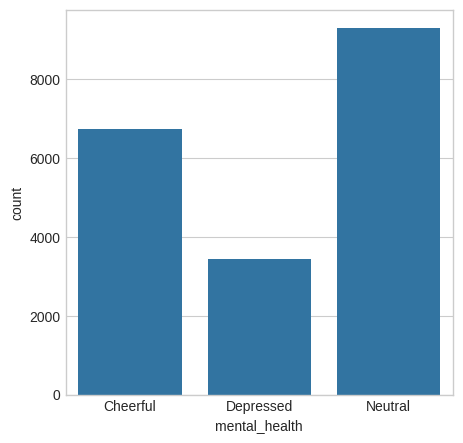

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='mental_health', data=text_df)

Text(0.5, 1.0, 'Mental health pie chart')

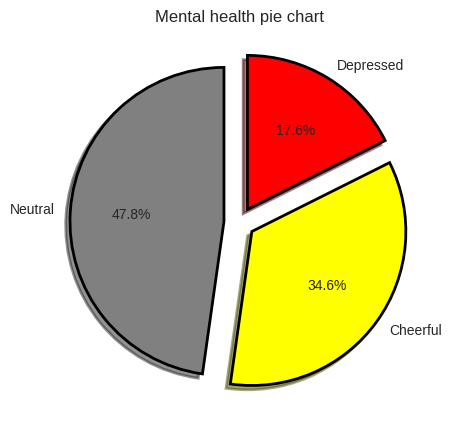

In [ ]:
fig = plt.figure(figsize=(5,5))
colors = ("grey", "yellow", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['mental_health'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Mental health pie chart')

In [ ]:
pos_tweets = text_df[text_df.mental_health == 'Cheerful']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,post_text,polarity,mental_health
4182,RT @sushio_: “@fuckuweeaboo: @sushio_ Mako is ...,1.0,Cheerful
19396,Best Choice Air Conditioning and Heating Inc. ...,1.0,Cheerful
4174,another perfect day,1.0,Cheerful
108,RT @designtaxi: The best times to post on Face...,1.0,Cheerful
39,"RT @craftsbeautiful: Happy #Monday, crafters! ...",1.0,Cheerful


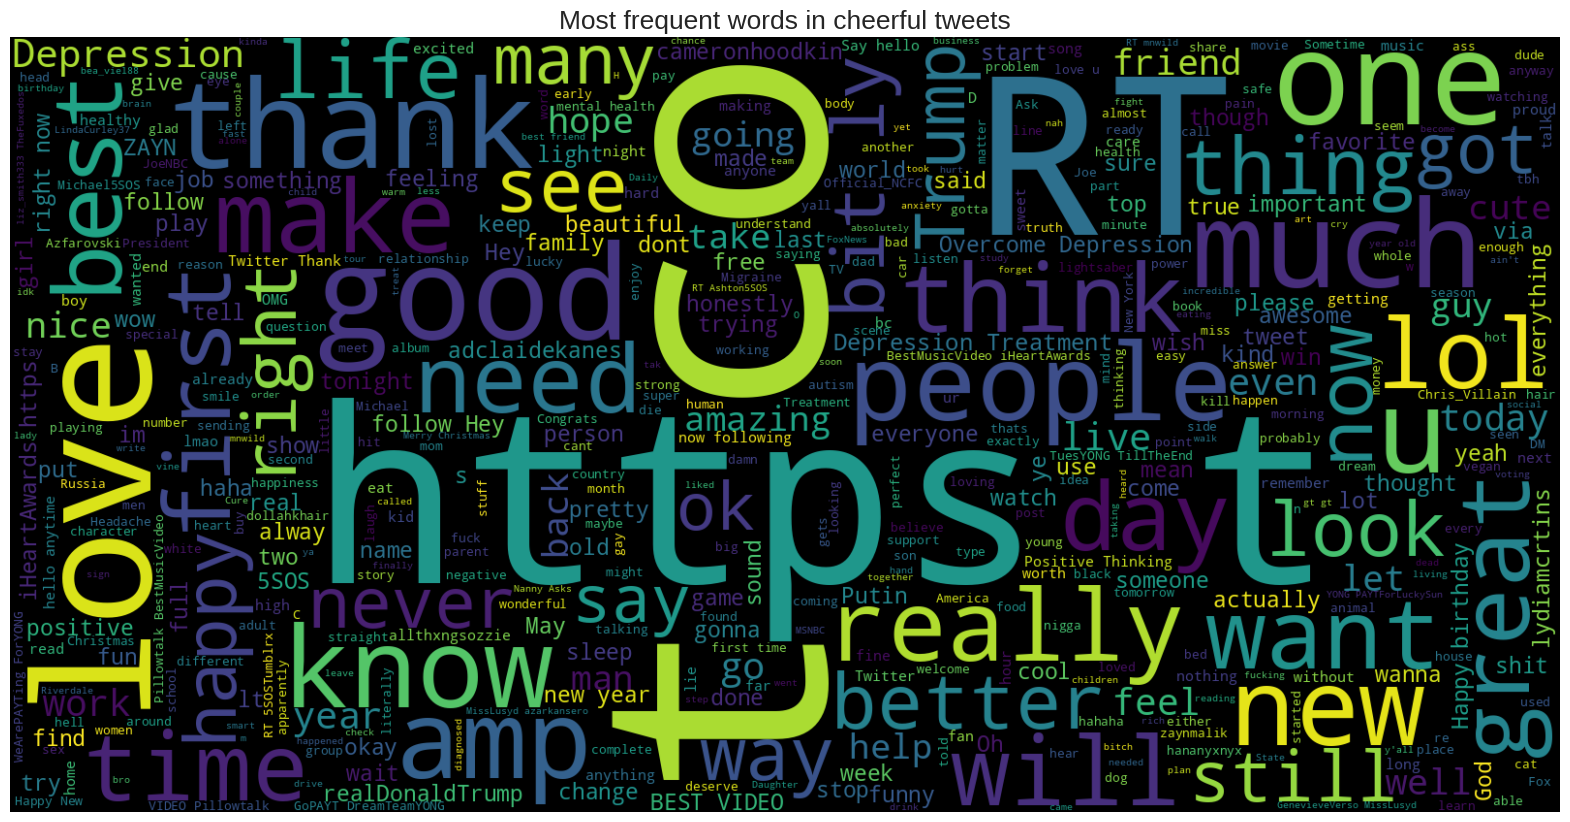

In [ ]:
text = ' '.join([word for word in pos_tweets['post_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in cheerful tweets', fontsize=19)
plt.show()

In [ ]:
neg_tweets = text_df[text_df.mental_health == 'Depressed']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,post_text,polarity,mental_health
8379,'Shazam SKH for more entries. Limit one entry ...,-5.551115e-17,Depressed
5953,I've ate so shit all day tomorrow I'm seriousl...,-9.523810e-04,Depressed
5070,RT @troyesivan: sorry to just drop this on ya ...,-1.623377e-03,Depressed
12857,"@Salon HEY JOY, This MORNING WAS A complete fa...",-3.298611e-03,Depressed
9380,But lately I been thinkin about a new whip fee...,-6.060606e-03,Depressed


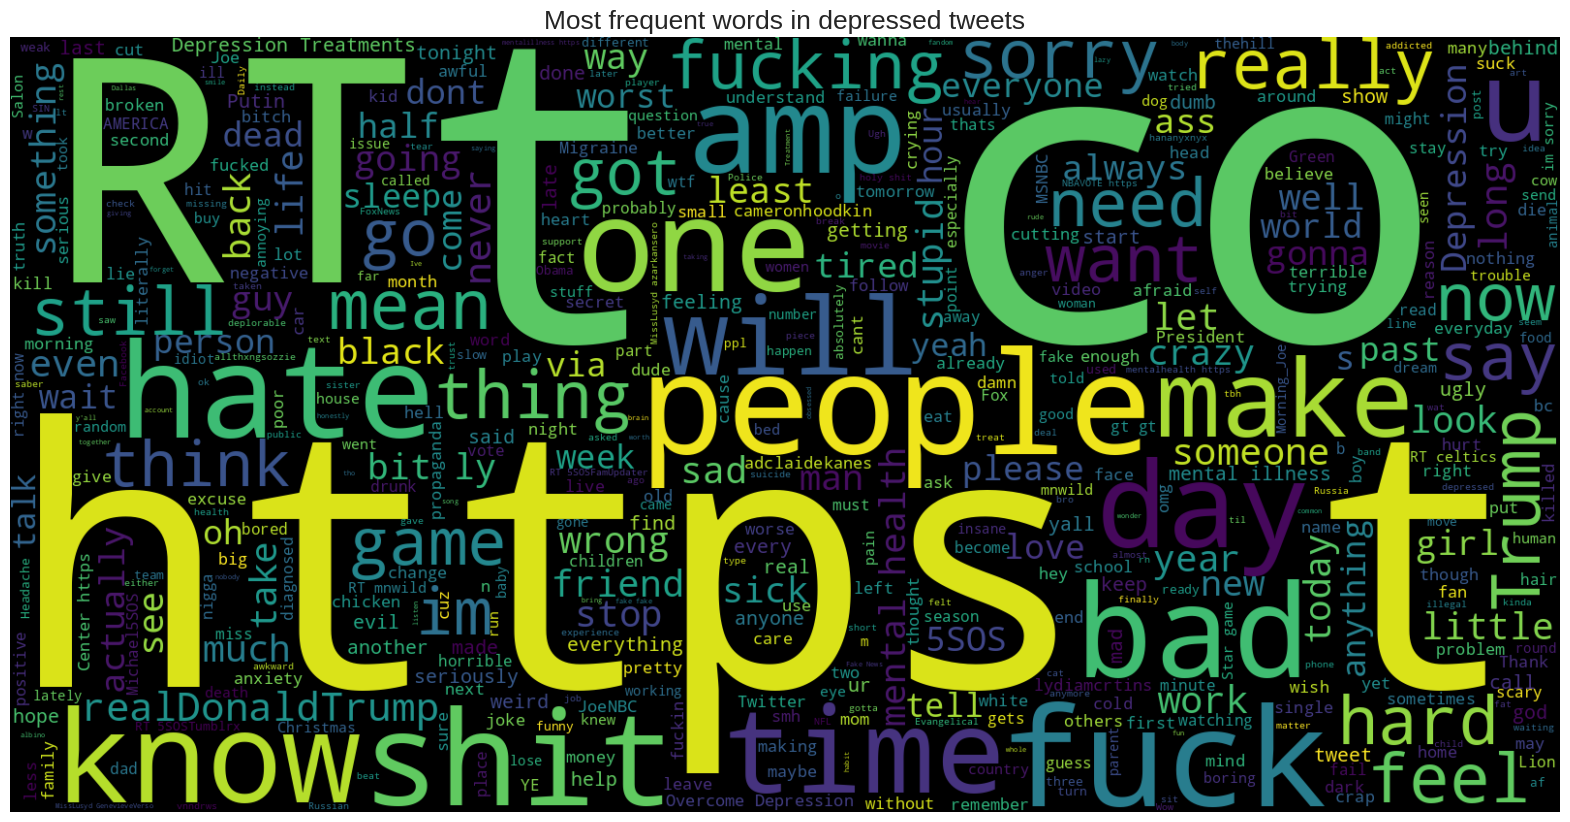

In [ ]:
text = ' '.join([word for word in neg_tweets['post_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in depressed tweets', fontsize=19)
plt.show()

In [ ]:
neutral_tweets = text_df[text_df.mental_health == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,post_text,polarity,mental_health
19995,A day without sunshine is like night.,0.0,Neutral
7,Currently in the finding-boxes-of-random-shit ...,0.0,Neutral
9,RT @itventsnews: ITV releases promo video for ...,0.0,Neutral
11,I never want to put one of these together agai...,0.0,Neutral
12,Moving stuff is bloomin’ knackering... and the...,0.0,Neutral


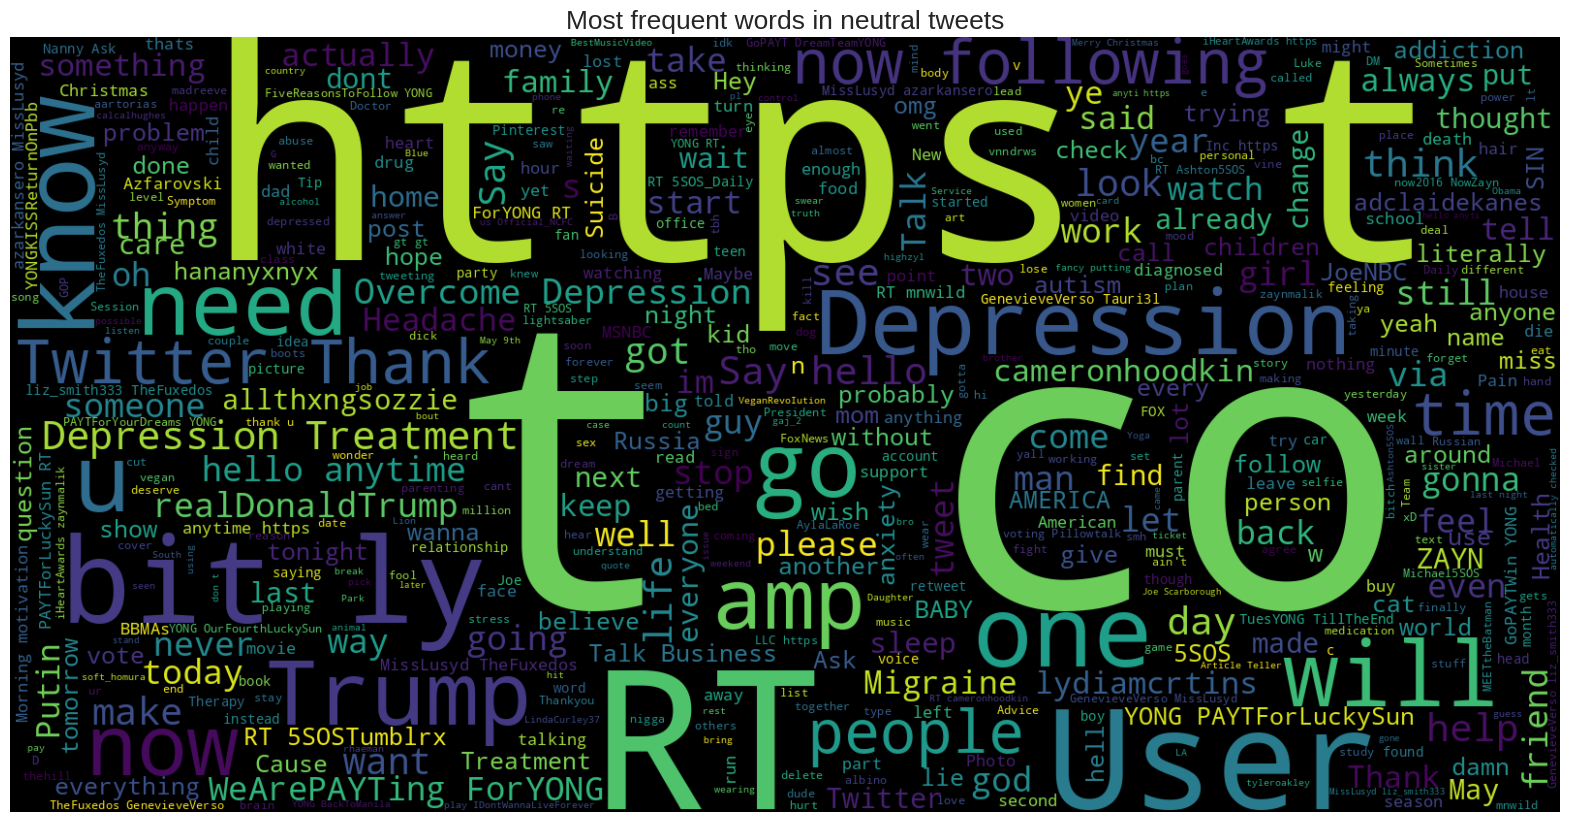

In [ ]:
text = ' '.join([word for word in neutral_tweets['post_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['post_text'])

In [ ]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 165361

First 20 features:
 ['00' '00 but' '00 for' '00 http' '00 https' '00 no' '00 on' '00 pm'
 '00 working' '000' '000 000' '000 000gop' '000 000or50' '000 000orx'
 '000 37' '000 advantage' '000 alike' '000 an' '000 annual' '000 believe']


In [ ]:
X = text_df['post_text']
Y = text_df['mental_health']
X = vect.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (15590, 165361)
Size of y_train: (15590,)
Size of x_test: (3898, 165361)
Size of y_test: (3898,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 85.76%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[1100   52  195]
 [  82  448  165]
 [  43   18 1795]]


              precision    recall  f1-score   support

    Cheerful       0.90      0.82      0.86      1347
   Depressed       0.86      0.64      0.74       695
     Neutral       0.83      0.97      0.90      1856

    accuracy                           0.86      3898
   macro avg       0.87      0.81      0.83      3898
weighted avg       0.86      0.86      0.85      3898



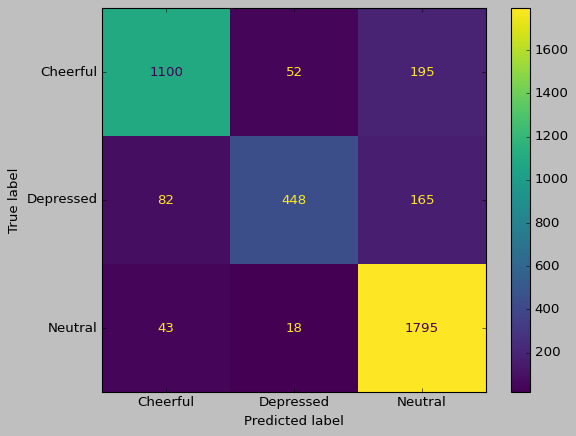

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 86.69%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[1111   64  172]
 [  77  472  146]
 [  43   17 1796]]


              precision    recall  f1-score   support

    Cheerful       0.90      0.82      0.86      1347
   Depressed       0.85      0.68      0.76       695
     Neutral       0.85      0.97      0.90      1856

    accuracy                           0.87      3898
   macro avg       0.87      0.82      0.84      3898
weighted avg       0.87      0.87      0.86      3898



In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [ ]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 87.40%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[1127   60  160]
 [  80  481  134]
 [  37   20 1799]]


              precision    recall  f1-score   support

    Cheerful       0.91      0.84      0.87      1347
   Depressed       0.86      0.69      0.77       695
     Neutral       0.86      0.97      0.91      1856

    accuracy                           0.87      3898
   macro avg       0.87      0.83      0.85      3898
weighted avg       0.88      0.87      0.87      3898



In [ ]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 1}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 87.40%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[1127   60  160]
 [  80  481  134]
 [  37   20 1799]]


              precision    recall  f1-score   support

    Cheerful       0.91      0.84      0.87      1347
   Depressed       0.86      0.69      0.77       695
     Neutral       0.86      0.97      0.91      1856

    accuracy                           0.87      3898
   macro avg       0.87      0.83      0.85      3898
weighted avg       0.88      0.87      0.87      3898

